In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn import preprocessing

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.metrics import mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
seed_value = 7

import os
os.environ['PYTHONHASHSEED']=str(seed_value)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import random
random.seed(seed_value)

np.random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)

import keras.backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [3]:
data = pd.read_csv('OnlineNewsPopularity.csv')

In [4]:
data.columns = data.columns.str.lstrip()
data = data.drop(labels=['url', 'timedelta'], axis=1)

In [5]:
data.shares.mean()

3395.3801836343455

In [6]:
y = data.shares
x = data.drop(labels=['shares'], axis =1)

In [7]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.33, random_state=7)

In [8]:
scaler = preprocessing.StandardScaler()

In [9]:
scaler.fit(x_train)

StandardScaler()

In [10]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
number_of_features = x_train.shape[1]
output_size = 1

In [12]:
model = Sequential()
model.add(Input(shape=(number_of_features, )))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=output_size))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3776      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,889
Trainable params: 5,889
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss=mean_squared_error, optimizer=Adam(learning_rate=0.0001), metrics=[mean_absolute_error])

In [15]:
early_stopping = EarlyStopping(monitor='mean_absolute_error', patience=5, min_delta = 100)

In [16]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose = 1, callbacks=[early_stopping])

Epoch 1/50
664/664 [==============================] - 2s 2ms/step - loss: 132966520.0000 - mean_absolute_error: 3319.3867 - val_loss: 330119840.0000 - val_mean_absolute_error: 3739.6262
Epoch 2/50
664/664 [==============================] - 1s 2ms/step - loss: 132855400.0000 - mean_absolute_error: 3304.7625 - val_loss: 329908352.0000 - val_mean_absolute_error: 3716.5886
Epoch 3/50
664/664 [==============================] - 1s 2ms/step - loss: 132607088.0000 - mean_absolute_error: 3271.9460 - val_loss: 329510976.0000 - val_mean_absolute_error: 3675.2148
Epoch 4/50
664/664 [==============================] - 1s 2ms/step - loss: 132157504.0000 - mean_absolute_error: 3217.2109 - val_loss: 328811360.0000 - val_mean_absolute_error: 3604.7761
Epoch 5/50
664/664 [==============================] - 1s 2ms/step - loss: 131497144.0000 - mean_absolute_error: 3134.0137 - val_loss: 327877440.0000 - val_mean_absolute_error: 3511.8179
Epoch 6/50
664/664 [==============================] - 1s 2ms/step - lo

In [17]:
train_scores = model.evaluate(x_train, y_train, batch_size=32)
train_scores

831/831 [==============================] - 1s 2ms/step - loss: 161090304.0000 - mean_absolute_error: 2662.6016


[161090304.0, 2662.6015625]

In [18]:
test_scores = model.evaluate(x_test, y_test, batch_size=32)
test_scores

409/409 [==============================] - 1s 1ms/step - loss: 1786924160.0000 - mean_absolute_error: 2980.2402


[1786924160.0, 2980.240234375]

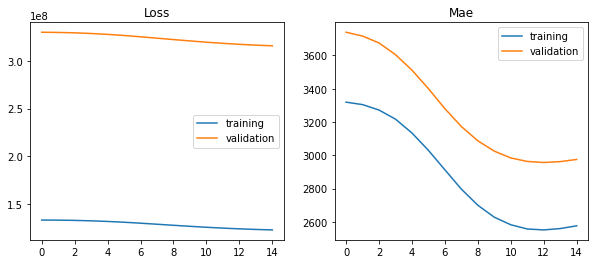

In [19]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(history.epoch, history.history['loss'], label='training')
plt.plot(history.epoch, history.history['val_loss'], label='validation')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Mae')
plt.plot(history.epoch, history.history['mean_absolute_error'], label='training')
plt.plot(history.epoch, history.history['val_mean_absolute_error'], label='validation')
plt.legend(loc='best')

plt.show()